# lectura de datos

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import scipy.stats as spstats

In [2]:
adult_df = pd.read_csv('adult.csv')
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Carácteristicas con datos numéricos o continuos

In [3]:
adult_df[['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Cambiar valores numeros en valores discretos (Cuantifiación)

In [ ]:
## Trabajando con la característica Edad

Text(0,0.5,'Frecuencia')

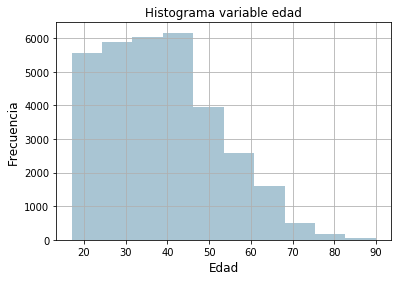

In [4]:
fig, ax = plot.subplots()
adult_df['age'].hist(color='#A9C5D3')
ax.set_title('Histograma variable edad', fontsize=12)
ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

In [6]:
adult_df['edad_redondeada'] = np.array(np.floor(np.array(adult_df['age']) / 10.))
rangos = [16, 31, 47, 63, 79, 95]
etiquetas_rangos = [1, 2, 3, 4, 5]
adult_df['edad_rangos'] = pd.cut(np.array(adult_df['age']), 
                                               bins=rangos)
adult_df['edad_etiquetas'] = pd.cut(np.array(adult_df['age']), 
                                               bins=rangos, labels=etiquetas_rangos)
adult_df[['age', 'edad_redondeada', 
               'edad_rangos', 'edad_etiquetas']].iloc[4000:4005]

,age,edad_redondeada,edad_rangos,edad_etiquetas
4000,25,2.0,"(16, 31]",1
4001,21,2.0,"(16, 31]",1
4002,18,1.0,"(16, 31]",1
4003,48,4.0,"(47, 63]",3
4004,27,2.0,"(16, 31]",1


Text(0,0.5,'Frecuencia')

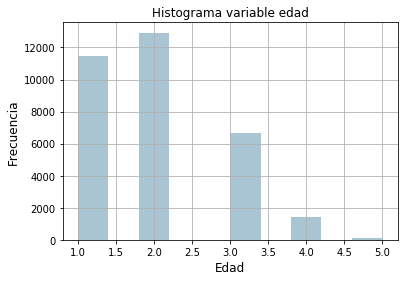

In [7]:
fig, ax = plot.subplots()
adult_df['edad_etiquetas'].hist(color='#A9C5D3')
ax.set_title('Histograma variable edad', fontsize=12)
ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
## Los datos con categorización no están uniformes debemos otra opción de categorizar

In [8]:
## probaremos con quartiles
quantile_list = [0, 0.25, .5, 0.75,1.]
quantiles = adult_df['age'].quantile(quantile_list)
quantiles


0.00    17.0
0.25    28.0
0.50    37.0
0.75    48.0
1.00    90.0
Name: age, dtype: float64

In [13]:
adult_df[adult_df['income']=='>50K']['age'].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

Text(0,0.5,'Frecuencia')

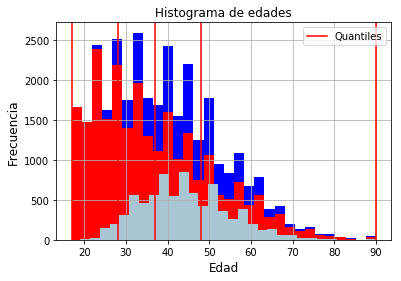

In [26]:
fig, ax = plot.subplots()
#adult_df['age'].hist(bins=30, color='#A9C5D3')
adult_df['age'].hist(bins=30, color='#0000FF')
adult_df[adult_df['income']=='<=50K']['age'].hist(bins=30, color='#FF0000')
adult_df[adult_df['income']=='>50K']['age'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plot.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Histograma de edades', fontsize=12)
ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

In [22]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
adult_df['age_quantile_range'] = pd.qcut(adult_df['age'], 
                                                 q=quantile_list)
adult_df['age_quantile_label'] = pd.qcut(adult_df['age'], 
                                                 q=quantile_list, labels=quantile_labels)
adult_df[['age', 'age_quantile_range', 'age_quantile_label']].iloc[4:9]

,age,age_quantile_range,age_quantile_label
4,41,"(37.0, 48.0]",50-75Q
5,34,"(28.0, 37.0]",25-50Q
6,38,"(37.0, 48.0]",50-75Q
7,74,"(48.0, 90.0]",75-100Q
8,68,"(48.0, 90.0]",75-100Q


In [50]:
adult_df['age_log'] = np.log((1+ adult_df['age']))
adult_df[['age', 'age_log']].iloc[4:9]

,age,age_log
4,41,3.737670
5,34,3.555348
6,38,3.663562
7,74,4.317488
8,68,4.234107


Text(11.5,450,'$\\mu$=3.62')

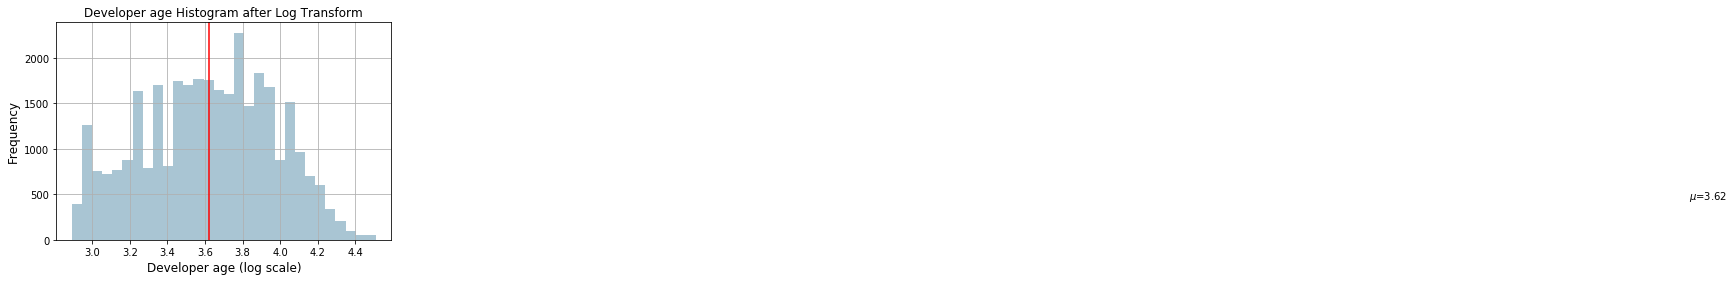

In [54]:
age_log_mean = np.round(np.mean(adult_df['age_log']), 2)

fig, ax = plot.subplots()
adult_df['age_log'].hist(bins=30, color='#A9C5D3')
plot.axvline(age_log_mean, color='r')
ax.set_title('Developer age Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer age (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(age_log_mean), fontsize=10)

In [59]:
# get optimal lambda value from non null income values
age = np.array(adult_df['age'])
age_clean = age[~np.isnan(age)]
l, opt_lambda = spstats.boxcox(age_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.17459141951553764


In [60]:
adult_df['age_boxcox_lambda_0'] = spstats.boxcox((1+adult_df['age']), 
                                                         lmbda=0)
adult_df['age_boxcox_lambda_opt'] = spstats.boxcox(adult_df['age'], 
                                                           lmbda=opt_lambda)
adult_df[['age', 'age_log', 
               'age_boxcox_lambda_0', 'age_boxcox_lambda_opt']].iloc[4:9]

,age,age_log,age_boxcox_lambda_0,age_boxcox_lambda_opt
4,41,3.737670,3.737670,5.225903
5,34,3.555348,3.555348,4.873667
6,38,3.663562,3.663562,5.081547
7,74,4.317488,4.317488,6.415424
8,68,4.234107,4.234107,6.237472


Text(24,450,'$\\mu$=5.01')

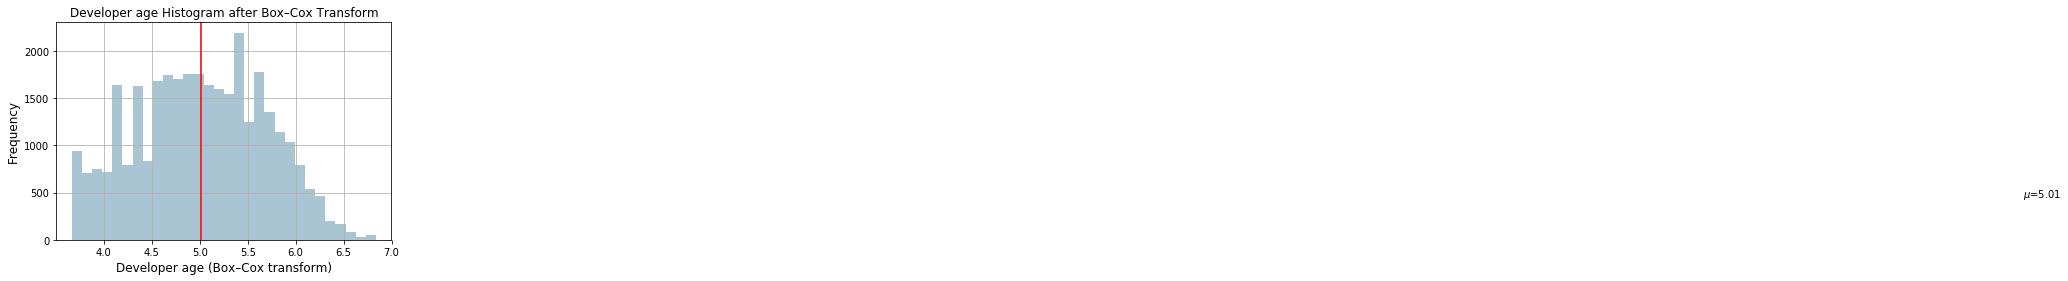

In [61]:
age_boxcox_mean = np.round(np.mean(adult_df['age_boxcox_lambda_opt']), 2)

fig, ax = plot.subplots()
adult_df['age_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3')
plot.axvline(age_boxcox_mean, color='r')
ax.set_title('Developer age Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Developer age (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(age_boxcox_mean), fontsize=10)

## Característica hours.per.week

Text(0,0.5,'Frecuencia')

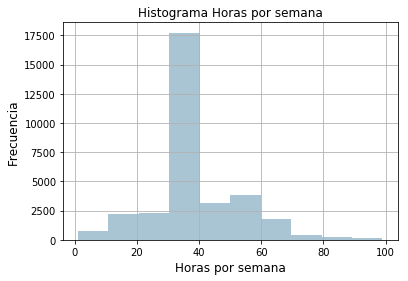

In [27]:
fig, ax = plot.subplots()
adult_df['hours.per.week'].hist(color='#A9C5D3')
ax.set_title('Histograma Horas por semana', fontsize=12)
ax.set_xlabel('Horas por semana', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

In [39]:
## probaremos con quartiles para horas por semana
quantile_list_horas_por_semana = [0.0, 0.5, 1.]
quantiles_horas_por_semana = adult_df['hours.per.week'].quantile(quantile_list_horas_por_semana)
quantiles_horas_por_semana


0.0     1.0
0.5    40.0
1.0    99.0
Name: hours.per.week, dtype: float64

Text(0,0.5,'Frecuencia')

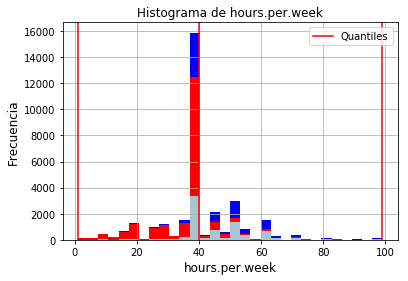

In [40]:
fig, ax = plot.subplots()
adult_df['hours.per.week'].hist(bins=30, color='#0000FF')
adult_df[adult_df['income']=='<=50K']['hours.per.week'].hist(bins=30, color='#FF0000')
adult_df[adult_df['income']=='>50K']['hours.per.week'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles_horas_por_semana:
    qvl = plot.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Histograma de hours.per.week', fontsize=12)
ax.set_xlabel('hours.per.week', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

In [44]:
quantile_labels_horas_por_semana = ['0-50Q', '50-100Q']
adult_df['hours.per.week_quantile_range'] = pd.qcut(adult_df['hours.per.week'], 
                                                 q=quantile_list_horas_por_semana)
adult_df['hours.per.week_quantile_label'] = pd.qcut(adult_df['hours.per.week'], 
                                                 q=quantile_list_horas_por_semana, labels=quantile_labels_horas_por_semana)
adult_df[['hours.per.week', 'hours.per.week_quantile_range', 'hours.per.week_quantile_label']].iloc[4:9]

,hours.per.week,hours.per.week_quantile_range,hours.per.week_quantile_label
4,40,"(0.999, 40.0]",0-50Q
5,45,"(40.0, 99.0]",50-100Q
6,40,"(0.999, 40.0]",0-50Q
7,20,"(0.999, 40.0]",0-50Q
8,40,"(0.999, 40.0]",0-50Q


In [55]:
adult_df['hours.per.week_log'] = np.log((1+ adult_df['hours.per.week']))
adult_df[['hours.per.week', 'hours.per.week_log']].iloc[4:9]

,hours.per.week,hours.per.week_log
4,40,3.713572
5,45,3.828641
6,40,3.713572
7,20,3.044522
8,40,3.713572


Text(11.5,450,'$\\mu$=3.67')

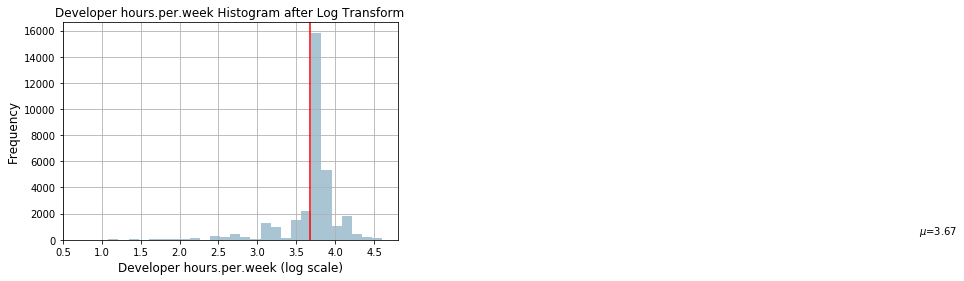

In [56]:
hours_per_week_log_mean = np.round(np.mean(adult_df['hours.per.week_log']), 2)

fig, ax = plot.subplots()
adult_df['hours.per.week_log'].hist(bins=30, color='#A9C5D3')
plot.axvline(hours_per_week_log_mean, color='r')
ax.set_title('Developer hours.per.week Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer hours.per.week (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(hours_per_week_log_mean), fontsize=10)

In [62]:
# get optimal lambda value from non null income values
hours_per_week = np.array(adult_df['hours.per.week'])
hours_per_week_clean = hours_per_week[~np.isnan(hours_per_week)]
l, opt_lambda = spstats.boxcox(hours_per_week_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 1.0015018537393474


In [63]:
adult_df['hours.per.week_boxcox_lambda_0'] = spstats.boxcox((1+adult_df['hours.per.week']), 
                                                         lmbda=0)
adult_df['hours.per.week_boxcox_lambda_opt'] = spstats.boxcox(adult_df['hours.per.week'], 
                                                           lmbda=opt_lambda)
adult_df[['hours.per.week', 'hours.per.week_log', 
               'hours.per.week_boxcox_lambda_0', 'hours.per.week_boxcox_lambda_opt']].iloc[4:9]

,hours.per.week,hours.per.week_log,hours.per.week_boxcox_lambda_0,hours.per.week_boxcox_lambda_opt
4,40,3.713572,3.713572,39.163404
5,45,3.828641,3.828641,44.191635
6,40,3.713572,3.713572,39.163404
7,20,3.044522,3.044522,19.061558
8,40,3.713572,3.713572,39.163404


Text(24,450,'$\\mu$=39.61')

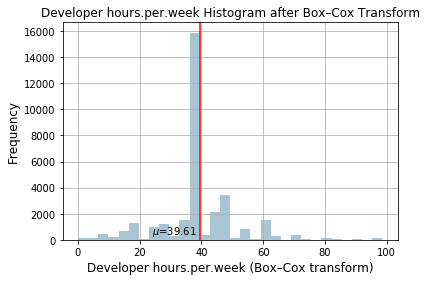

In [66]:
hours_per_week_boxcox_mean = np.round(np.mean(adult_df['hours.per.week_boxcox_lambda_opt']), 2)

fig, ax = plot.subplots()
adult_df['hours.per.week_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3')
plot.axvline(hours_per_week_boxcox_mean, color='r')
ax.set_title('Developer hours.per.week Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Developer hours.per.week (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(hours_per_week_boxcox_mean), fontsize=10)

## Característica de capital.gain

Text(0,0.5,'Frecuencia')

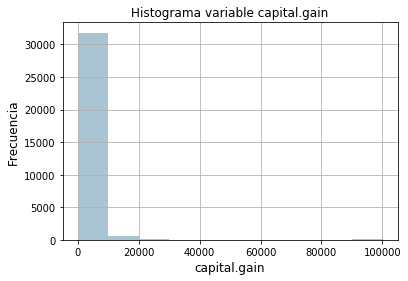

In [45]:
fig, ax = plot.subplots()
adult_df['capital.gain'].hist(color='#A9C5D3')
ax.set_title('Histograma variable capital.gain', fontsize=12)
ax.set_xlabel('capital.gain', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

In [46]:
adult_df['capital.gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

## Procesamientos de características Categoricas nominales

In [74]:
workclass = np.unique(adult_df['workclass'])
workclass

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [75]:
from sklearn.preprocessing import LabelEncoder

gle_workclass = LabelEncoder()
workclass_labels = gle_workclass.fit_transform(adult_df['workclass'])
workclass_mappings = {index: label for index, label in enumerate(gle_workclass.classes_)}
workclass_mappings

{0: '?',
 1: 'Federal-gov',
 2: 'Local-gov',
 3: 'Never-worked',
 4: 'Private',
 5: 'Self-emp-inc',
 6: 'Self-emp-not-inc',
 7: 'State-gov',
 8: 'Without-pay'}

In [76]:
adult_df['workclassLabel'] = workclass_labels
adult_df[['workclass', 'workclassLabel']].iloc[1:7]

,workclass,workclassLabel
1,Private,4
2,?,0
3,Private,4
4,Private,4
5,Private,4
6,Private,4


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,age_quantile_label,hours.per.week_quantile_range,hours.per.week_quantile_label,age_log,hours.per.week_log,age_boxcox_lambda_0,age_boxcox_lambda_opt,hours.per.week_boxcox_lambda_0,hours.per.week_boxcox_lambda_opt,workclassLabel
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,...,75-100Q,"(0.999, 40.0]",0-50Q,4.510860,3.713572,4.510860,6.837590,3.713572,39.163404,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,75-100Q,"(0.999, 40.0]",0-50Q,4.418841,2.944439,4.418841,6.635020,2.944439,17.052696,4
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,...,75-100Q,"(0.999, 40.0]",0-50Q,4.204693,3.713572,4.204693,6.175271,3.713572,39.163404,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,75-100Q,"(0.999, 40.0]",0-50Q,4.007333,3.713572,4.007333,5.765468,3.713572,39.163404,4
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,50-75Q,"(0.999, 40.0]",0-50Q,3.737670,3.713572,3.737670,5.225903,3.713572,39.163404,4


In [78]:
marital_status = np.unique(adult_df['marital.status'])
marital_status

array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype=object)

In [79]:
from sklearn.preprocessing import LabelEncoder

gle_marital_status = LabelEncoder()
marital_status_labels = gle_marital_status.fit_transform(adult_df['marital.status'])
marital_status_mappings = {index: label for index, label in enumerate(gle_marital_status.classes_)}
marital_status_mappings

{0: 'Divorced',
 1: 'Married-AF-spouse',
 2: 'Married-civ-spouse',
 3: 'Married-spouse-absent',
 4: 'Never-married',
 5: 'Separated',
 6: 'Widowed'}

In [87]:
adult_df['marital.statusLabel'] = marital_status_labels
adult_df[['marital.status', 'marital.statusLabel']].iloc[1:7]

,marital.status,marital.statusLabel
1,Widowed,6
2,Widowed,6
3,Divorced,0
4,Separated,5
5,Divorced,0
6,Separated,5


In [88]:
occupation_status = np.unique(adult_df['occupation'])
occupation_status

array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving'], dtype=object)

In [89]:
from sklearn.preprocessing import LabelEncoder

gle_occupation = LabelEncoder()
occupation_labels = gle_occupation.fit_transform(adult_df['occupation'])
occupation_mappings = {index: label for index, label in enumerate(gle_occupation.classes_)}
occupation_mappings

{0: '?',
 1: 'Adm-clerical',
 2: 'Armed-Forces',
 3: 'Craft-repair',
 4: 'Exec-managerial',
 5: 'Farming-fishing',
 6: 'Handlers-cleaners',
 7: 'Machine-op-inspct',
 8: 'Other-service',
 9: 'Priv-house-serv',
 10: 'Prof-specialty',
 11: 'Protective-serv',
 12: 'Sales',
 13: 'Tech-support',
 14: 'Transport-moving'}

In [92]:
adult_df['occupationLabel'] = occupation_labels
adult_df[['occupation', 'occupationLabel']].iloc[1:7]

,occupation,occupationLabel
1,Exec-managerial,4
2,?,0
3,Machine-op-inspct,7
4,Prof-specialty,10
5,Other-service,8
6,Adm-clerical,1


In [93]:
relationship_status = np.unique(adult_df['relationship'])
relationship_status

array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife'], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder

gle_relationship = LabelEncoder()
relationship_labels = gle_relationship.fit_transform(adult_df['relationship'])
relationship_mappings = {index: label for index, label in enumerate(gle_relationship.classes_)}
relationship_mappings

{0: 'Husband',
 1: 'Not-in-family',
 2: 'Other-relative',
 3: 'Own-child',
 4: 'Unmarried',
 5: 'Wife'}

In [95]:
adult_df['relationshipLabel'] = relationship_labels
adult_df[['relationship', 'relationshipLabel']].iloc[1:7]

,relationship,relationshipLabel
1,Not-in-family,1
2,Unmarried,4
3,Unmarried,4
4,Own-child,3
5,Unmarried,4
6,Unmarried,4


In [96]:
race = np.unique(adult_df['race'])
race

array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
       'White'], dtype=object)

In [97]:
from sklearn.preprocessing import LabelEncoder

gle_race = LabelEncoder()
race_labels = gle_race.fit_transform(adult_df['race'])
race_mappings = {index: label for index, label in enumerate(gle_race.classes_)}
race_mappings

{0: 'Amer-Indian-Eskimo',
 1: 'Asian-Pac-Islander',
 2: 'Black',
 3: 'Other',
 4: 'White'}

In [99]:
adult_df['raceLabel'] = race_labels
adult_df[['race', 'raceLabel']].iloc[1:7]

,race,raceLabel
1,White,4
2,Black,2
3,White,4
4,White,4
5,White,4
6,White,4


In [100]:
sex = np.unique(adult_df['sex'])
sex

array(['Female', 'Male'], dtype=object)

In [101]:
from sklearn.preprocessing import LabelEncoder

gle_sex = LabelEncoder()
sex_labels = gle_sex.fit_transform(adult_df['sex'])
sex_mappings = {index: label for index, label in enumerate(gle_sex.classes_)}
sex_mappings

{0: 'Female', 1: 'Male'}

In [102]:
adult_df['sexLabel'] = sex_labels
adult_df[['sex', 'sexLabel']].iloc[1:7]

,sex,sexLabel
1,Female,0
2,Female,0
3,Female,0
4,Female,0
5,Female,0
6,Male,1


In [103]:
native_country = np.unique(adult_df['native.country'])
native_country

array(['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan',
       'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia'], dtype=object)

In [104]:
from sklearn.preprocessing import LabelEncoder

gle_native_country = LabelEncoder()
native_country_labels = gle_native_country.fit_transform(adult_df['native.country'])
native_country_mappings = {index: label for index, label in enumerate(gle_native_country.classes_)}
native_country_mappings

{0: '?',
 1: 'Cambodia',
 2: 'Canada',
 3: 'China',
 4: 'Columbia',
 5: 'Cuba',
 6: 'Dominican-Republic',
 7: 'Ecuador',
 8: 'El-Salvador',
 9: 'England',
 10: 'France',
 11: 'Germany',
 12: 'Greece',
 13: 'Guatemala',
 14: 'Haiti',
 15: 'Holand-Netherlands',
 16: 'Honduras',
 17: 'Hong',
 18: 'Hungary',
 19: 'India',
 20: 'Iran',
 21: 'Ireland',
 22: 'Italy',
 23: 'Jamaica',
 24: 'Japan',
 25: 'Laos',
 26: 'Mexico',
 27: 'Nicaragua',
 28: 'Outlying-US(Guam-USVI-etc)',
 29: 'Peru',
 30: 'Philippines',
 31: 'Poland',
 32: 'Portugal',
 33: 'Puerto-Rico',
 34: 'Scotland',
 35: 'South',
 36: 'Taiwan',
 37: 'Thailand',
 38: 'Trinadad&Tobago',
 39: 'United-States',
 40: 'Vietnam',
 41: 'Yugoslavia'}

In [106]:
adult_df['native_countryLabel'] = native_country_labels
adult_df[['native.country', 'native_countryLabel']].iloc[1:7]

,native.country,native_countryLabel
1,United-States,39
2,United-States,39
3,United-States,39
4,United-States,39
5,United-States,39
6,United-States,39


In [107]:
unique_occupation = np.unique(adult_df[['occupation']])
print("Total occupation:", len(unique_occupation))
print(unique_occupation)

Total occupation: 15
['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']


In [114]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(adult_df['occupation'])
hashed_features = hashed_features.toarray()
pd.concat([adult_df[['occupation']], pd.DataFrame(hashed_features)], axis=1).iloc[1:8]

,occupation,0,1,2,3,4,5
1,Exec-managerial,-1.0,2.0,3.0,0.0,1.0,0.0
2,?,0.0,0.0,-1.0,0.0,0.0,0.0
3,Machine-op-inspct,-4.0,0.0,1.0,-4.0,1.0,-3.0
4,Prof-specialty,-1.0,2.0,2.0,-3.0,1.0,-1.0
5,Other-service,0.0,4.0,0.0,-3.0,1.0,-3.0
6,Adm-clerical,0.0,2.0,3.0,-1.0,2.0,-2.0
7,Prof-specialty,-1.0,2.0,2.0,-3.0,1.0,-1.0


In [115]:
fh.get_params()

{'alternate_sign': True,
 'dtype': numpy.float64,
 'input_type': 'string',
 'n_features': 6,
 'non_negative': False}